<a href="https://colab.research.google.com/github/nbkwon/ml-assignment/blob/master/ml_assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# we now need pyplot for plotting data
import matplotlib.pyplot as pyplot
def show_plot(download_file = False):
    pyplot.show()
    if download_file == False:
       return
    
    import google.colab
    file_name = "test.png"
    pyplot.savefig(file_name)
    google.colab.files.download(file_name)

def make_plot(plot_data_list, use_this = None):
    # it's too samll. make bigger.
    if use_this is None:
        pyplot.figure(figsize=(8, 8))
    else:
        # use_this.set_figheight(8)
        # use_this.set_figwidth(8)
        pass

    for data_dic, plot_type, color in plot_data_list:
        if plot_type is "plot":
            if use_this is None:
                pyplot.plot(list(data_dic.keys()), list(data_dic.values()), c=color)
            else:
                use_this.plot(list(data_dic.keys()), list(data_dic.values()), c=color)    
        if plot_type is "scatter":
            if use_this is None:
                pyplot.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)
            else:
                use_this.scatter(list(data_dic.keys()), list(data_dic.values()), c=color)

In [0]:
# 과제 2에서 가져온 함수

import numpy

def sigmoid(value):
    # print("value -> numpy.exp(-value)", value, numpy.exp(-value))
    return 1 / (1 + numpy.exp(-value))

def get_by_sigmoid(t_list, factor_list):
    # print("get_by_linear(t_list, factor_list)", get_by_linear(t_list, factor_list))
    return sigmoid(get_by_linear(t_list, factor_list))

def get_by_linear(t_list, factor_list):
    # print(t_list, factor_list)
    sum = t_list[0]
    for t, factor in zip(t_list[1:], factor_list):
        sum = sum + t * factor

    # print("return sum", sum)
    return sum

# 
def calc_energy_value(theta_list, data_dic):
    ret = 0

    m = len(data_dic)

    for factor_list, r_in_d in data_dic.items():
        # (−l(i)log(sigmoid)−(1−l(i))log(1−σ(z(i))))
        z_i = get_by_sigmoid(theta_list, factor_list)


        # print(z_i, r_in_d)

        calc_result = -r_in_d * numpy.log(z_i) - (1 - r_in_d) * numpy.log(1 - z_i)

        ret = ret + calc_result

    return ret / m
    
# Gradient Descent를 위해 cost function을 변형한 식
def calc_cost_sum_for_gradient_descent(theta_list, data_dic, multiply_bitmap):
    ret = 0

    m = len(data_dic)

    for factor_list, result_in_data in data_dic.items():
        calc_y = get_by_sigmoid(theta_list, factor_list)
        calc_result = calc_y - result_in_data

        for factor, multiply_flag in zip(factor_list, multiply_bitmap):
            if multiply_flag == 0:
                continue

            calc_result = calc_result * factor

        ret = ret + calc_result

    return ret / m
    
def next_gradient_descent_step(step_size, theta_list, data_dic):
    next_theta_list = []
    for i in range(len(theta_list)):
        bitmap = []
        for j in range(len(theta_list) - 1):
            if i - 1 == j:
                bitmap.append(1)
            else:
                bitmap.append(0)

        # print(bitmap)

        next_theta = theta_list[i] - step_size * calc_cost_sum_for_gradient_descent(theta_list, data_dic, bitmap)
        next_theta_list.append(next_theta)

    return next_theta_list
    
def check_convergence(theta_list, new_theta_list):
    # float 형의 자료형 동일한지 판단을 위해 numpy의 isclose를 사용.
    atol = 0.0000001
    return numpy.isclose(theta_list, new_theta_list, rtol=atol, atol=atol)
    # return numpy.isclose(theta_list, new_theta_list)

In [0]:
import numpy as np
import matplotlib.pyplot as plt

data    = np.genfromtxt("data.txt", delimiter=',')

x       = data[:, 0]
y       = data[:, 1]
label   = data[:, 2]

x_label0    = x[label == 0]
x_label1    = x[label == 1]

y_label0    = y[label == 0]
y_label1    = y[label == 1]

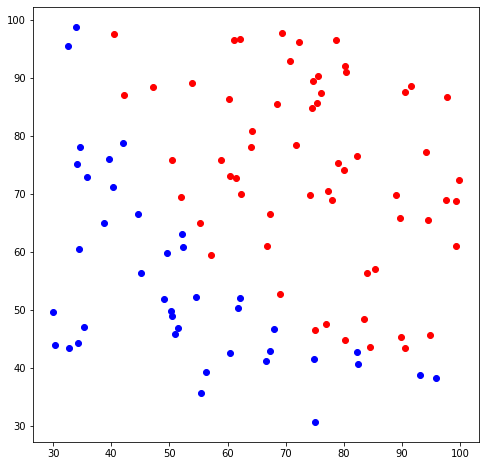

In [0]:
label0_dic = dict(zip(x[label == 0], y[label == 0]))
label1_dic = dict(zip(x[label == 1], y[label == 1]))

make_plot([(label0_dic, "scatter", "blue"), (label1_dic, "scatter", "red")])
show_plot()

In [0]:
dic0 = dict(zip(zip(x_label0, y_label0), [0] * len(x_label0)))
dic1 = dict(zip(zip(x_label1, y_label1), [1] * len(x_label1)))
factor_to_result = {**dic0, **dic1}

current_theta_list = [0.035, 0.01578, 0.0111345]

step_size = 0.005

step_count = 0

step_count_to_energy_value = {step_count: calc_energy_value(current_theta_list, factor_to_result)}
step_count_to_theta_list = {step_count: current_theta_list}

# print(current_theta_list, "loss", step_count_to_energy_value[0])
# print(current_theta_list, "loss", step_count_to_energy_value_test[0])

print("start ->",current_theta_list, "loss", step_count_to_energy_value[step_count])

no_loop = 0

while(True):
    step_count = step_count + 1
    next_theta_list = next_gradient_descent_step(step_size / numpy.sqrt(numpy.log(step_count+1)), current_theta_list, factor_to_result)
    
    step_count_to_energy_value[step_count] = calc_energy_value(next_theta_list, factor_to_result)

    step_count_to_theta_list[step_count] = next_theta_list
    
    if check_convergence(current_theta_list, next_theta_list).all():
        break

    # no_loop = no_loop + 1
    # if(no_loop > 10000):
        # no_loop = 0
        # print(current_theta_list, "->", next_theta_list, "loss", step_count_to_energy_value[step_count], "step mul", numpy.log(numpy.log(step_count+1) + 1))
        # break
    
    # print(current_theta_list, "->", next_theta_list, "loss", step_count_to_energy_value[step_count])
    current_theta_list = next_theta_list

# show calculated theta
print("current_theta_pair", current_theta_list, "loop", no_loop)

start -> [0.035, 0.01578, 0.0111345] loss 0.7456631646014334
current_theta_pair [-20.78546255056417, 0.17125758255800744, 0.1660515573442298] loop 0


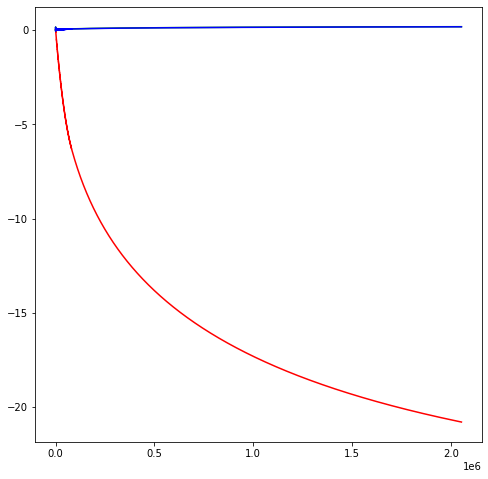

In [0]:
map_in_list = [{},{},{},{}]
for step_count, theta_list in step_count_to_theta_list.items():
    map_in_list[0][step_count] = theta_list[0]
    map_in_list[1][step_count] = theta_list[1]
    map_in_list[2][step_count] = theta_list[2]

make_plot([(map_in_list[0], "plot", "red"), (map_in_list[1], "plot", "green"), (map_in_list[2], "plot", "blue")])

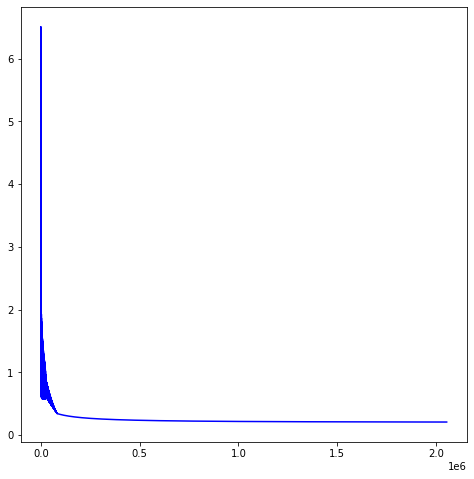

In [0]:
make_plot([(step_count_to_energy_value, "plot", "blue")])

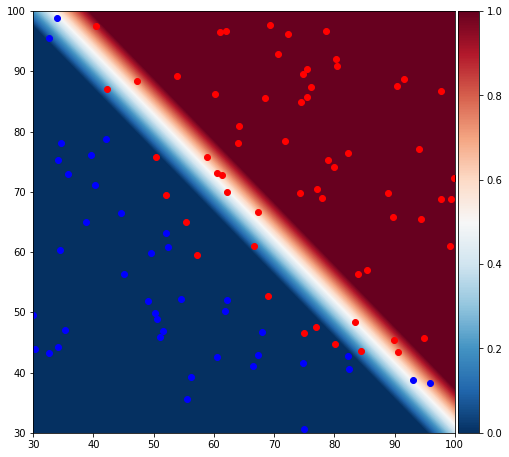

In [0]:
# 3D 표현을 위해 필요
from mpl_toolkits import mplot3d

x = np.arange(30, 100, 0.5)
xx, yy = np.meshgrid(x, x)

def_calc_cost = np.frompyfunc(lambda x, y: get_by_linear(current_theta_list, (x, y)), 2, 1)
result = def_calc_cost.reduce((xx, yy), axis=0).astype(np.float64)

# 참고 https://matplotlib.org/3.1.1/gallery/axes_grid1/simple_colorbar.html#sphx-glr-gallery-axes-grid1-simple-colorbar-py

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = pyplot.figure(figsize=(8, 8)) 
ax = pyplot.subplot(111)
make_plot([(label0_dic, "scatter", "blue"), (label1_dic, "scatter", "red")], ax)

cm = pyplot.cm.RdBu_r
ax.set_ylim(bottom=30, top=100)
ax.set_xlim(left=30, right=100)
# ax.pcolormesh(result, )/
ax.imshow(result, cmap=cm, origin='lower', interpolation='bilinear', vmin=0, vmax=1)
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.05)
pyplot.colorbar(im, cax=cax)

pyplot.show()
